<a href="https://colab.research.google.com/github/Praveen76/Introduction-to-PySpark-and-MLLib/blob/main/Introduction_to_PySpark_and_MLLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, you will be able to

* interact with Spark using python
* understand Spark dataframes
* implement linear regression using PySpark

## Dataset

The dataset chosen for this assignment is [Ecommerce customers](https://www.kaggle.com/srolka/ecommerce-customers). The dataset is made up of 500 records and 8 columns. It has customer information, such as e-mail, address, and their color avatar. Then it also has numerical value columns.

* Avg Session Length: Average session of in-store style advice sessions
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent

Here, we will be using the first four features to perform linear regression using spark and predict Yearly Amount Spent by each customer.

## Information

**Why do we need Spark?**

Spark is one of the latest technologies being used to quickly and easily handle Big Data. Spark is an open-source distributed computing framework that promises a clean and pleasurable experience similar to that of Pandas, while scaling to large data sets via a distributed architecture under the hood.

Apache Spark is a powerful cluster computing engine, therefore it is designed for fast computation of big data. Spark runs on Memory (RAM), and that makes the processing much faster than on Disk. It includes "MLlib" library to perform Machine Learning tasks using the Spark framework.

## Introduction

Apache Spark is known as a fast, easy to use and general engine for big data processing, with built-in modules for streaming, SQL, machine learning and graph processing. It’s well-known for its speed, ease of use, generality and the ability to run virtually everywhere. And even though Spark is one of the most asked tools for data engineers, also data scientists can benefit from Spark when doing exploratory data analysis, feature extraction, supervised learning and model evaluation.

Spark is a platform for cluster computing that lets you spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.

In [15]:
import yaml
import json
import os
from google.colab import drive

# Mount Google Drive with force remount
drive.mount('/content/drive', force_remount=True)


# Load relevant API Keys
file_path = '/content/drive/MyDrive/.API_KEYS/API_KEYS.yml'

with open(file_path, 'r') as file:
    api_keys = yaml.safe_load(file)


# Extract Kaggle username and key
aws_access_key_id = api_keys['AWS']['AWS_ACCESS_KEY_ID']
aws_secret_access_key = api_keys['AWS']['AWS_SECRET_ACCESS_KEY']


os.environ['AWS_ACCESS_KEY_ID']=aws_access_key_id
os.environ['AWS_SECRET_ACCESS_KEY']=aws_secret_access_key
del aws_access_key_id, aws_secret_access_key


Mounted at /content/drive


### Setup Steps:

### Importing required packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## PySpark

PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.

<figure>
<img src='https://cdn.iisc.talentsprint.com/CDS/Images/pyspark_components.png' width = 700 px/>
</figure>

**Spark SQL and DataFrame**

Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrame and can also act as distributed SQL query engine.

**Streaming**

Running on top of Spark, the streaming feature in Apache Spark enables powerful interactive and analytical applications across both streaming and historical data, while inheriting Spark’s ease of use and fault tolerance characteristics.

**MLlib**

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

**Spark Core**

Spark Core is the underlying general execution engine for the Spark platform that all other functionality is built on top of. It provides an RDD (Resilient Distributed Dataset) and in-memory computing capabilities.

#### Install PySpark

In [5]:
!pip -q install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


#### Start a Spark Session

Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0. It provides a way to interact with various spark’s functionality with a lesser number of constructs. Instead of having spark context, hive context, SQL context, now everything is encapsulated in a Spark session.

In [6]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LinearRegression').getOrCreate()
spark

### Data Processing using Pyspark

#### Loading data into PySpark

To load the dataset we will use the `read.csv` module.  The `inferSchema` parameter provided will enable Spark to automatically determine the data type for each column. Also, `header` and `sep` parameters are given as the dataset contains header, and values are separated using vertical bar.

In [17]:
!pip install awscli
!aws s3 cp s3://datasciencedataset/ecommerce_customers_.csv .


download: s3://datasciencedataset/ecommerce_customers_.csv to ./ecommerce_customers_.csv


In [18]:
df = spark.read.csv("ecommerce_customers_.csv", sep = "|", header=True, inferSchema = True)           # creating spark data frame

#### Data exploration with PySpark

* Display data types of dataframe columns

In [19]:
# Print the data types
df.dtypes

[('Email', 'string'),
 ('Address', 'string'),
 ('Avatar', 'string'),
 ('Avg Session Length', 'double'),
 ('Time on App', 'double'),
 ('Time on Website', 'double'),
 ('Length of Membership', 'double'),
 ('Yearly Amount Spent', 'double')]

* Display column details

In [20]:
# Print the Schema of the DataFrame
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



* Display rows

In [21]:
df.show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|riverarebecca@gma...|1414 David Throug...|   

* Display total number of rows

In [22]:
df.count()

500

* Display column labels

In [23]:
df.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

* Display specific columns

In [24]:
columns = ["Email","Time on App","Time on Website"]
df.select(columns).show(5)

+--------------------+------------------+------------------+
|               Email|       Time on App|   Time on Website|
+--------------------+------------------+------------------+
|mstephenson@ferna...| 12.65565114916675| 39.57766801952616|
|   hduke@hotmail.com|11.109460728682564|37.268958868297744|
|    pallen@yahoo.com|11.330278057777512|37.110597442120856|
|riverarebecca@gma...|13.717513665142507| 36.72128267790313|
|mstephens@davidso...|12.795188551078114| 37.53665330059473|
+--------------------+------------------+------------------+
only showing top 5 rows



* Display the statistics of dataframe

In [25]:
df.describe().show()

+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|            Email|             Address|     Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|              500|                 500|        500|               500|               500|               500|                 500|                500|
|   mean|             NULL|                NULL|       NULL| 33.05319351819619|12.052487937166134| 37.06044542094859|   3.533461555915055|  499.3140382585909|
| stddev|             NULL|                NULL|       NULL|0.9925631110845354|0.9942156084725424|1.0104889067564033|  0.9992775024112585|   79.3147815497068|
|    min|aaron04@yahoo.com|0001 Mack MillNor..

* Display total distinct values in *Avatar* column

In [26]:
# Distinct value count
df.select('Avatar').distinct().count()

138

* Display count of distinct values in *Avatar* column

In [27]:
df.groupby('Avatar').count().show(10)

+-----------+-----+
|     Avatar|count|
+-----------+-----+
|ForestGreen|    2|
|    DimGray|    4|
|   SeaGreen|    4|
|       Aqua|    6|
|       Teal|    7|
| DodgerBlue|    3|
|  MintCream|    3|
|      Khaki|    2|
|  LightGray|    3|
|  LightBlue|    2|
+-----------+-----+
only showing top 10 rows



* Plot the count of distinct values in *Avatar* column

In [28]:
DF = df.groupby('Avatar').count().sort("count", ascending= False)
DF.show(8)

+------------+-----+
|      Avatar|count|
+------------+-----+
| GreenYellow|    7|
|        Teal|    7|
|   SlateBlue|    7|
|        Cyan|    7|
|   CadetBlue|    7|
|   PeachPuff|    6|
|LightSkyBlue|    6|
|      Purple|    6|
+------------+-----+
only showing top 8 rows



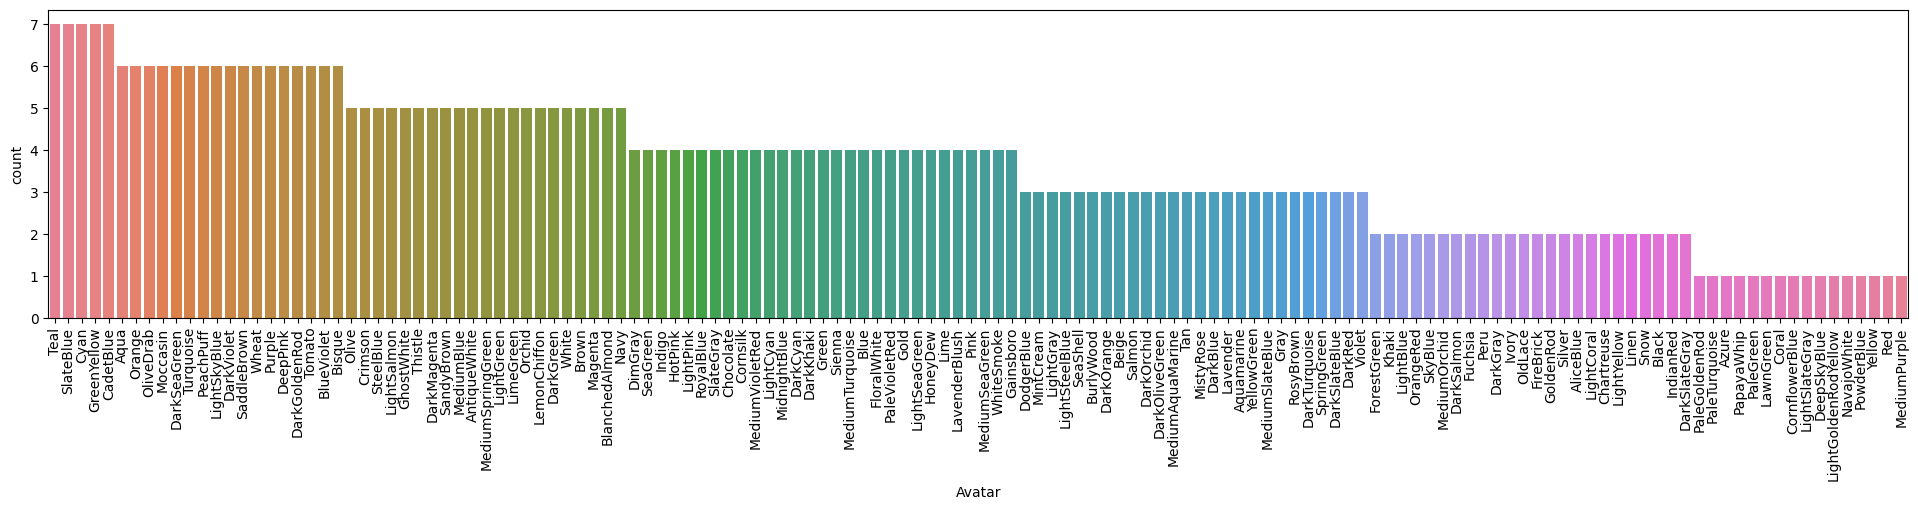

In [29]:
plt.figure(figsize= (24,4))
sns.barplot(data= DF.toPandas(), x= 'Avatar', y= 'count', hue=DF.toPandas()['Avatar'])
plt.xticks(rotation= 90)
plt.show()

* Display average time spent on app by users having different *Avatar*

In [30]:
df.groupby('Avatar').avg().select(['Avatar', 'avg(Time on App)']).show(5)

+-----------+------------------+
|     Avatar|  avg(Time on App)|
+-----------+------------------+
|ForestGreen|11.801835104426386|
|    DimGray|12.013773141157184|
|   SeaGreen|11.352012316138753|
|       Aqua|12.207605304482167|
|       Teal| 11.77888239909872|
+-----------+------------------+
only showing top 5 rows



* Display the records where average time spent on website by user is greater than 37 minutes

In [31]:
df.filter(df['Time on Website'] > 37).show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|mstephens@davidso...|14023 Rodriguez P...|Med

* Display the minimum Yearly Amount Spent where average time spent on website by user is greater than 39 minutes

In [32]:
from pyspark.sql.functions import col, min
df.filter(col('Time on Website')>39).agg(min('Yearly Amount Spent')).show()

+------------------------+
|min(Yearly Amount Spent)|
+------------------------+
|      350.05820016384513|
+------------------------+



* Display the records where average time spent on app by user is greater than 12 minutes and average time spent on website is smaller than 37 minutes

In [33]:
from pyspark.sql.functions import col
df.filter((col('Time on App')>12) &(col('Time on Website') < 37)).show(10, truncate=False)

+-----------------------------+------------------------------------------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|Email                        |Address                                               |Avatar     |Avg Session Length|Time on App       |Time on Website   |Length of Membership|Yearly Amount Spent|
+-----------------------------+------------------------------------------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|riverarebecca@gmail.com      |1414 David ThroughwayPort Jason, OH 22070-1220        |SaddleBrown|34.30555662975554 |13.717513665142507|36.72128267790313 |3.120178782748092   |581.8523440352177  |
|alvareznancy@lucas.biz       |645 Martha Park Apt. 611Jeffreychester, MN 67218-7250 |FloralWhite|33.871037879341976|12.026925339755056|34.47687762925054 |5.493507201364199   |637.102447915074   |
|wrightpeter@ya

To know more about other `pyspark.sql.functions` operation click [here](https://spark.apache.org/docs/2.4.0/api/python/pyspark.sql.html#module-pyspark.sql.functions).

### Linear Regression Model

Linear Regression model is one of the oldest and widely used machine learning approach which assumes a relationship between dependent and independent variables. It consists of the best fitting line through the scattered points on the graph and this best fitting line is known as the regression line.

#### Setting Up DataFrame for Model

For Spark to accept the data, it needs to be in the form of two columns ("labels", "features")

* Features are data points of all the attributes to be used for prediction
* Labels are output for each data point
* We will be predicting Label from Features

For the linear regression model, we need to import two modules from Pyspark i.e. Vector Assembler and Linear Regression. Vector Assembler is a transformer that assembles all the features into one vector from multiple columns that contain type double.

To know more about vector assembler click [here](https://spark.apache.org/docs/2.1.0/ml-features.html#vectorassembler).

In [34]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [35]:
assembler = VectorAssembler(
                            inputCols= ["Avg Session Length", "Time on App", "Time on Website",'Length of Membership'],
                            outputCol= "features")       # features is the name of output columns which combines all the columns

In [36]:
output = assembler.transform(df)            # A new column 'features' will be created along with the existing columns
                                            # features column will include all the values combined in one list

In [37]:
output.show(10)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|            features|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|[34.4972677251122...|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|[31.9262720263601...|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37

In [38]:
output.select("features").show(10, truncate= False)          # displays only the features column (which includes all other column values in a list)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|[34.49726772511229,12.65565114916675,39.57766801952616,4.0826206329529615]  |
|[31.92627202636016,11.109460728682564,37.268958868297744,2.66403418213262]  |
|[33.000914755642675,11.330278057777512,37.110597442120856,4.104543202376424]|
|[34.30555662975554,13.717513665142507,36.72128267790313,3.120178782748092]  |
|[33.33067252364639,12.795188551078114,37.53665330059473,4.446308318351434]  |
|[33.871037879341976,12.026925339755056,34.47687762925054,5.493507201364199] |
|[32.02159550138701,11.366348309710526,36.68377615286961,4.685017246570912]  |
|[32.739142938380326,12.35195897300293,37.37335885854755,4.4342734348999375] |
|[33.98777289568564,13.386235275676436,37.534497341555735,3.2734335777477144]|
|[31.936548618448917,11.814128294972196,37.145168223

In [39]:
# Complete dataset is represented in 2 columns
final_data = output.select("features",'Yearly Amount Spent')

#### Splitting the data into Training and Test set

In [40]:
# Splitting the data in Train and Test set(70% training data, 30% testing data)
train_data, test_data = final_data.randomSplit([0.7,0.3])

In [41]:
train_data.describe().show()

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                374|
|   mean| 499.85018933367525|
| stddev|  77.13342968524968|
|    min| 256.67058229005585|
|    max|  744.2218671047146|
+-------+-------------------+



In [42]:
test_data.describe().show()

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                126|
|   mean|  497.7226057023882|
| stddev|  85.76767310590246|
|    min|   266.086340948469|
|    max|  765.5184619388373|
+-------+-------------------+



#### Create a Linear Regression Model object and fit on train data

In [43]:
regressor = LinearRegression(featuresCol="features", labelCol="Yearly Amount Spent")

#Learn to fit the model from training set
model = regressor.fit(train_data)

#### Predicting the Test set results

In [44]:
predict = model.transform(test_data)

predict.select(predict.columns[:]).show(10)

+--------------------+-------------------+------------------+
|            features|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[30.3931845423455...|  319.9288698031936|331.92335432668915|
|[30.7377203726281...|  461.7807421962299| 451.2778627358475|
|[30.8162006488763...|   266.086340948469| 283.8040318296771|
|[30.8364326747734...|  467.5019004269896|471.82398954479686|
|[31.1280900496166...|  557.2526867470547| 564.9715790954604|
|[31.2606468698795...|  421.3266312569514|422.82707976876713|
|[31.2834474760581...|  591.7810894256675| 569.3812590436955|
|[31.3584771924370...|  495.1759504494754|491.39066620943845|
|[31.3662121671876...|  430.5888825564849|426.95775528588524|
|[31.4459724827577...| 484.87696493512857| 482.6901232961702|
+--------------------+-------------------+------------------+
only showing top 10 rows



#### Evaluating Model Performance

In [45]:
metrics = model.evaluate(test_data)                             # Using evaluate method we can verify our model's performance

print('Mean absolute error: {}'.format(metrics.meanAbsoluteError))
print('Root mean squared error: {}'.format(metrics.rootMeanSquaredError))
print('R_squared value: {}'.format(metrics.r2))

Mean absolute error: 8.423497686650242
Root mean squared error: 10.685910406014816
R_squared value: 0.9843528108032875


To know more about other operations in pyspark click [here](https://cdn.iisc.talentsprint.com/CDS/cheatSheet_pyspark.pdf).